## Data Analytics Lab (2nd Week)
RAJ JAIN | CH17B066

### Probability Distribution, Moments, Visualisation, Data Generation, Parameter Estimation, Hypothesis Testing, Correlation

### Basic moments of one-dimensional data and visualisation

Implement functions to compute median, mode, sample mean, sample variance, standard deviation of one-dimensional data 
"without using numpy". 

Example :
data1 = np.array([1,2,3,4,5])

data1_median = median(data1)

data1_mode = mode(data1)

data1_mean = mean(data1)

data1_variance = variance(data1)

data1_stddev = stddev(data1)

In [166]:
# import dependencies
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Compute the above for different one-dimensional datasets - data1.txt, data2.txt, data3.txt, data4.txt and store as data1_median, data2_median etc. Verify the results using the numpy built in functions for mean,stddev and variance.

In [45]:
#ALL THE FUNCTIONS IN THIS CELL TAKE A ONE DIMENSIONAL NUMPY ARRAY AS INPUT

# mean
def mean(arr):
    #Input: One dimensional numpy array
    return np.sum(arr)/arr.shape[0]


# median
def median(arr):
    #Input: One dimensional numpy array
    n=arr.shape[0]
    arr.sort()
    if n % 2 == 0: 
        median1 = arr[n//2] 
        median2 = arr[n//2 - 1] 
        medianx = (median1 + median2)/2
    else: 
        medianx = arr[n//2] 
    return medianx


# mode
def mode(arr):
    #Input: One dimensional numpy array
    arr=arr.tolist()
    most = max(list(map(arr.count, arr)))
    return list(set(filter(lambda x: arr.count(x) == most, arr)))


# variance
def variance(arr):
    #Input: One dimensional numpy array
    mean = np.sum(arr)/arr.shape[0]
    var = np.sum((xi - mean) ** 2 for xi in arr) / arr.shape[0]
    return var


#stddev
def stddev(arr):
    #Input: One dimensional numpy array
    mean = np.sum(arr)/arr.shape[0]
    var = np.sum((xi - mean) ** 2 for xi in arr) /arr.shape[0]
    return var**0.5

In [46]:
#Verifying with numpy functions:
arr = np.array([1,2,3,4,3,1,20,1,2,3,6,6,4,4,2])

print("Mean of the array using coded function is",mean(arr))
print("Mean of the array using numpy function is",np.mean(arr),"\n\n")

print("Median of the array using coded function is",median(arr))
print("Median of the array using numpy function is",np.median(arr),"\n\n")

print("Variance of the array using coded function is",variance(arr))
print("Variance of the array using numpy function is",np.var(arr),"\n\n")

print("Standard Deviation of the array using coded function is",stddev(arr))
print("Standard Deviation of the array using numpy function is",np.std(arr),"\n\n")

Mean of the array using coded function is 4.133333333333334
Mean of the array using numpy function is 4.133333333333334 


Median of the array using coded function is 3
Median of the array using numpy function is 3.0 


Variance of the array using coded function is 20.38222222222222
Variance of the array using numpy function is 20.38222222222222 


Standard Deviation of the array using coded function is 4.514667454223203
Standard Deviation of the array using numpy function is 4.514667454223203 




Visualize all the datasets (1-4) separately using matplotlib scatter plot and histograms. 

1. Comment on initial observations of distributions. 

2. For each dataset, specify which descriptive statistics best describe the data.

Example :

data1 - mean

data2 - mean

data3 - mean

data4 - mean

Hints: If you want to plot a known distribution (Normal,Unifrom, Exponential etc) using matplotlib, define it as a function 
and plot it. For this, you need to know the formula of the chosen distribution. If you dont know the exact distribution 
of a dataset, plot it as a histogram and smooth the data by converting bin edges to centres. Using seaborn library: 
    Install seaborn library and use $\texttt{distplot()}$ function to plot the distribution and verify the result.

In [163]:
#Generating Datasets
data1 = np.random.normal(loc = 5, scale = 2, size = 200)
data2 = np.random.randint(1000, size = 200)
data3 = np.concatenate((np.random.normal(loc = 5, scale = 2, size = 100), np.random.normal(loc = 10, scale = 2, size = 100)))
data4 = np.random.randint(700, size = 200)
x=np.linspace(1,200,num=200)

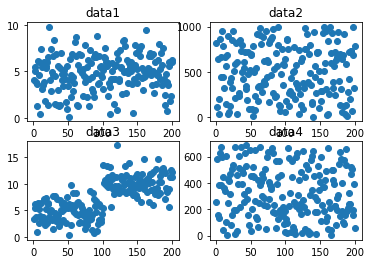

In [164]:
# visualization by scatter plot
fig, axs = plt.subplots(2,2)
axs[0, 0].scatter(x,data1)
axs[0, 1].scatter(x,data2)
axs[1, 0].scatter(x,data3)
axs[1, 1].scatter(x,data4)

axs[0, 0].title.set_text('data1')
axs[0, 1].title.set_text('data2')
axs[1, 0].title.set_text('data3')
axs[1, 1].title.set_text('data4')
plt.show()


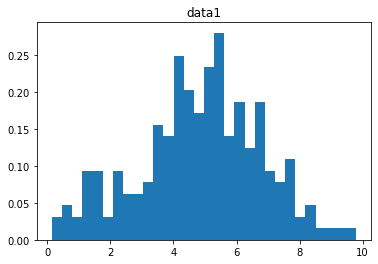

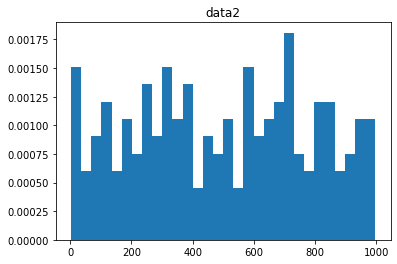

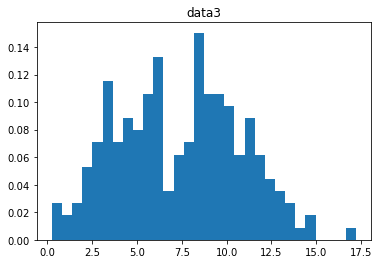

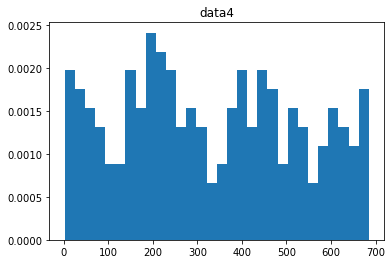

In [167]:
# histogram plot
plt.hist(data1, bins=30, density = True)
plt.title('data1')
plt.show()
plt.hist(data2, bins=30, density = True)
plt.title('data2')
plt.show()
plt.hist(data3, bins=30, density = True)
plt.title('data3')
plt.show()
plt.hist(data4, bins=30, density = True)
plt.title('data4')
plt.show()

Best descriptive statistic for each statistic are:
 data1 (normal) - mean
 data1 (uniform) - mean
 data1 (bimodal) - median
 data1 (uniform) - mean/median



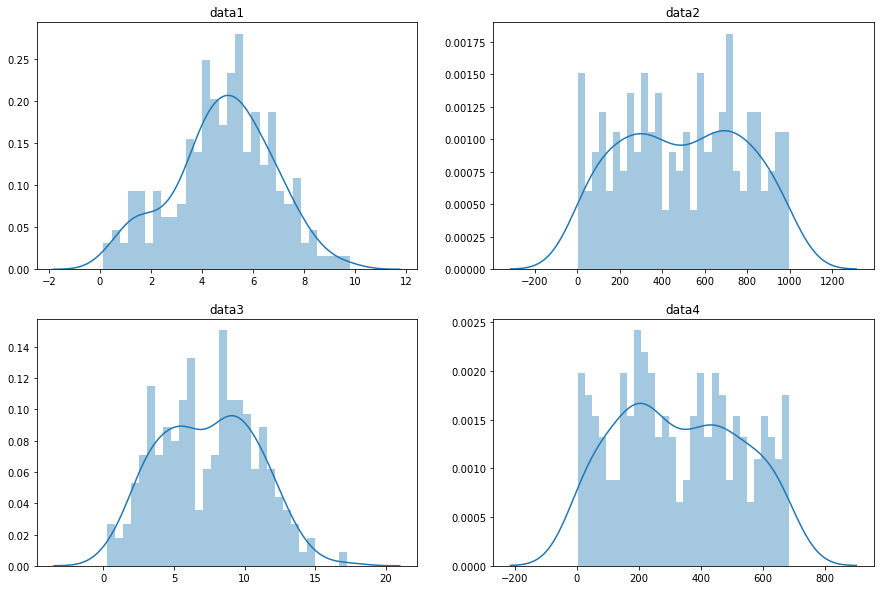

In [179]:
#Histogram and density plots using seaborn


fig,axes = plt.subplots(2,2,figsize=(15,10))


sns.distplot(data1, bins=30, hist=True, kde=True, ax=axes[0,0])
axes[0,0].set_title('data1')

sns.distplot(data2, bins=30, hist=True, kde=True, ax=axes[0,1])
axes[0,1].set_title('data2')

sns.distplot(data3, bins=30, hist=True, kde=True, ax=axes[1,0])
axes[1,0].set_title('data3')

sns.distplot(data4, bins=30, hist=True, kde=True, ax=axes[1,1])
axes[1,1].set_title('data4')

print("Best descriptive statistic for each statistic are:\n","data1 (normal) - mean\n","data1 (uniform) - mean\n", "data1 (bimodal) - median\n", "data1 (uniform) - mean/median\n")

### Probability Distribution parameters and visualisation

Uniform Distribution: A uniform distribution, also called a rectangular distribution, is a probability distribution that has constant probability. This distribution is defined by two parameters, a and b: a is the minimum and b is the maximum.

Formula: 
\begin{align*}
f(x) = \frac{1}{b-a} , a \leq x \leq b
\end{align*}
Parameters:  $\text{Mean} = \frac{(a+b)}{2} ; \text{Variance} = \frac{1}{12(b-a)^2}$


Gaussian Distribution: The normal distribution is a probability function that describes how the values of a variable are distributed. It is a symmetric distribution where most of the observations cluster around the central peak and the probabilities for values further away from the mean taper off equally in both directions. For mean, $\mu$ and standard deviation, $\sigma$, the formula is given as
\begin{align*}
f(x) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}
\end{align*}

Use the random.normal() method to get a Normal Data Distribution.

It has three parameters:

loc - (Mean) where the peak of the bell exists.

scale - (Standard Deviation) how flat the graph distribution should be.

size - The shape of the returned array.

Given a normal distribution of mean = 3 and standard deviation = 1. 
1. Find $P(x\leq3)$ from the given distribution. 
2. Find the probability that $P(3\lt x\leq5)$ drawn from the given distribution. 
Write a function to estimate the above cumulative distribution function of a normal distribution. Verify the same.
 

In [23]:
normal_data = np.random.normal(loc = 3, scale = 1, size = 5000)
normal_data.sort()

def estimateCDF(x, a, b):
    """
    PARAMETERS:
    x : input 1D data
    a, b: data points at which cdf is to be estimated 
    
    RETURNS:
    cdf : cumulative distibution values s.t. P(a<x<=b)  
    """
    n = len(x)
    prob = np.arange(1,len(x)) / (len(x))
    for i in range(len(x)):
        if x[i]>=a:
            left_bound = prob[i]
            break
    
    for i in range(len(x)):
        if x[i]>b:
            right_bound = prob[i-1]
            break
    cdf = right_bound - left_bound
    return cdf

#Find P(X<3)
print("1. P(X<=3):",estimateCDF(normal_data,-np.Inf,3))
#Find P(3<X<=5)
print("2. P(3<X<=5):",estimateCDF(normal_data,3,5))

1. P(X<=3): 0.5002
2. P(3<X<=5): 0.47519999999999996


### Maximum Likelihood Estimation for normal distribution : 
A method of estimating the parameters of a distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable. For normal distribution, $f(x,\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$, the goal is to determine $\mu$ and $\sigma$ for our data so that we can match our data to its most likely Gaussian bell curve. The estimated mean, $\hat{\mu}$ for normal distribution is  $\hat{\mu} = \frac{1}{n}\sum_{i=1}^nx_i$ and the estimated standard deviation is $\hat{\sigma} = \sqrt{ \frac{1}{n}\sum_{i=1}^n(x_i-\mu)^2}$.

Assuming that data1 has been sampled from normal distribution with unknown mean and standard deviation of 2, calculate $95\%$ confidence interval of data1_mean.

In [154]:
# Let's generate data1 sampled from normal distribution with mean = 5, and std deviation = 2
np.random.seed(10)
data1_true_mean = 5
data1_std = 2
data1 = np.random.normal(loc = data1_true_mean, scale = data1_std, size = 200)
data1_sample_mean = mean(data1)

#95% Confidence interval for mean
#alpha = 0.05/2 = 0.025
#z value for 95% confidence on either side is 1.96
conf_left = data1_sample_mean - 1.96*data1_std/(len(data1)**0.5)
conf_right = data1_sample_mean + 1.96*data1_std/(len(data1)**0.5)

print("95%% Confidence interval of data1_mean is [%.2f, %.2f]" %(conf_left, conf_right))

95% Confidence interval of data1_mean is [4.87, 5.43]


### Parameter estimation

In this section you will fit data to a standard distribution.

Normal distribution 
"DataSet1.txt" is to be fitted to normal distribution. Complete the function fitNormal() to estimate parameters.

In [60]:
def fitNormal(x):
    """
    PARAMETERS:
    x : input 1D data
    
    RETURNS:
    mu : mean of distribution
    sig : standard deviation of distribution
    """
    mu=mean(x)
    sig=stddev(x)
    return [mu, sig]
    

Read the file "DataSet1.txt" into a variable $\texttt{data1}$. Also plot a histogram of the same. Then pass it to $\texttt{fitNormal()}$ to estimate parameters. Generate your own data using estimated parameters and plot the distribution. Use $\texttt{numpy.linspace()}$ to generate 1000 points in the range of $\texttt{data1}$. The probabilities are estimated from Gaussian distribution formula. Make a lineplot in the same figure.

Mean: 28.48864870364574 | Standard Deviation: 48.13095425816694


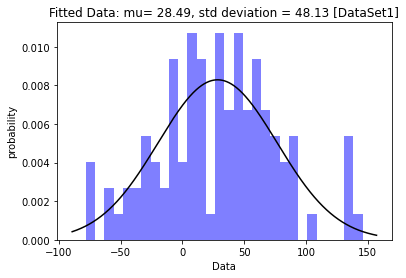

In [181]:
from scipy.stats import norm
# Read datafile
dataSet1 = np.loadtxt(fname = "DataSet1.txt")


# Plot histogram of input data
n,x,_=plt.hist(dataSet1, bins=30, facecolor='blue', alpha=0.5, density=True)

# Fit data to normal distribution
mu,sig = fitNormal(dataSet1)
print("Mean:",mu,"| Standard Deviation:",sig)

# Generate data using estimated parameters for visualization and plot the same
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,num=1000)
pdf = norm.pdf(x,mu,sig)
plt.plot(x,pdf,'k')
plt.xlabel('Data')
plt.ylabel('probability')
Title = 'Fitted Data: mu= %.2f, std deviation = %.2f [DataSet1]' %(mu,sig)
plt.title(Title)
plt.show()

"DataSet2.txt" is to be fitted to uniform distribution. Complete the function fitUniform() to estimate parameters. Generate and plot data as before.

In [55]:
def fitUniform(x):
    """
    PARAMETERS:
    x : input 1D data
    
    RETURNS:
    a : minimum value of distribution
    b : maximum value of distribution
    """
    a=np.min(x)
    b=np.max(x)
 
    return a, b

Read the file "DataSet2.txt" into a variable "data2". Also plot a histogram of the same. Then pass it to $\texttt{fitUniform()}$ to estimate parameters. Generate your own data using estimated parameters and plot the distribution.

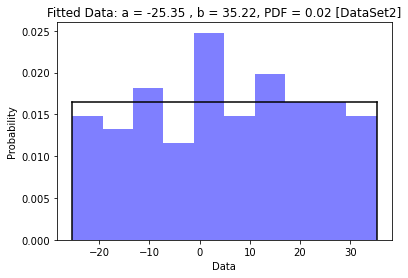

In [180]:
# Read datafile
dataSet2 = np.loadtxt(fname = "DataSet2.txt")


# Plot histogram of input data
plt.hist(dataSet2,bins=10,facecolor='blue', alpha=0.5, density=True)
plt.ylabel('Probability')
plt.xlabel('Data')


# Fit data to uniform distribution
a,b=fitUniform(dataSet2)


# Generate data using estimated parameters for visualization and plot the same
x=np.linspace(a,b,num=1000)
pdf=1/(b-a)*np.ones(1000)
plt.plot(x,pdf,'k')
plt.axvline(x=b, ymax=(1/(b-a))/0.026, color='k')
plt.axvline(x=a, ymax=(1/(b-a))/0.026, color='k')
Title = "Fitted Data: a = %.2f , b = %.2f, PDF = %.2f [DataSet2]" % (a,b,(1/(b-a)))
plt.title(Title)
plt.show()

## Correlation

In this section you are required to measure correlation between two variables. The dataset "**AirQualityData.csv**" contains daily readings of $\text{PM}_{10}$ and $O_3$ concentration in air along with temperature readings. To verify if the variation concentration of any of these pollutants is associated with temperature changes, measure the correlation between temperature and each of these pollutants. Complete the function $\texttt{correlationCoeff()}$ below that measures the correlation coefficient between two given time-series data. For a given n two data sets x and y, the Pearson coefficient formula is given as

\begin{align*}
    r_{xy} = \frac{cov(X,Y)}{\sigma(X)\cdot \sigma(Y)}
\end{align*}
$cov(X,Y) = \frac{\Sigma_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{n-1}; \\ $ 
$\sigma(X), \sigma(Y)$ are respective standard deviations


In [92]:

def correlationCoeff(x, y):
    """
    PARAMETERS:
    x : input 1D data
    y : input 1D data
    
    RETURNS:
    est : coefficient value
    """
    n=len(x)
    covxy = np.sum(np.multiply((x-mean(x)),(y-mean(y)))/(n-1))
    est = covxy/(stddev(x)*stddev(y))
    return est
    

Read the file "AirQualityData.csv" . Ignoring the "date" column, read columns "temp", "pm10" and "o3" as the dataframe as pass them to the function $\texttt{correlationCoeff()}$ to estimate seperately the effect of "pm10" on "temp" and "o3" on "temp". Which of the pollutants has a greater impact on temperature? Compare the value that you get from the above function with the python built in function $\texttt{df.corr()}$ . 

In [96]:
# Read datafile
AirQualityData = pd.read_csv("AirQualityData.csv",index_col="date")

# Estimate correlation
corr_pm10_temp = correlationCoeff(AirQualityData["pm10"], AirQualityData["temp"])
print("Correlation between pm10 and temperature is = %.2f" % corr_pm10_temp)

corr_o3_temp = correlationCoeff(AirQualityData["o3"], AirQualityData["temp"])
print("Correlation between o3 and temperature is = %.2f" % corr_o3_temp)

Correlation between pm10 and temperature is = 0.36
Correlation between o3 and temperature is = 0.57


In [94]:
AirQualityData.corr()

,temp,pm10,o3
temp,1.000000,0.362391,0.570239
pm10,0.362391,1.000000,0.333296
o3,0.570239,0.333296,1.000000


## From the correlation data, it can be observed that the o3 has more impact on the temperature.

### Hypothesis Testing and Confidence Interval 

P Value: A p-value for a statistical model is the probability that when the null hypothesis is true, the statistical summary is equal to or greater than the actual observed results. This is also termed ‘probability value’ or ‘asymptotic significance’. The null hypothesis states that two measured phenomena experience no relationship to each other. We denote this as H or H0. If one or more of these probabilities turn out to be less than or equal to α, the level of significance, we reject the null hypothesis.

Example: One such null hypothesis can be that the number of hours spent in the office affects the amount of salary paid. For a significance level of 5%, if the p-value falls lower than 5%, the null hypothesis is invalidated. Then it is discovered that the number of hours you spend in your office will not affect the amount of salary you will take home. 

T Test: Such a test tells us whether a sample of numeric data strays or differs significantly from the population. It also talks about two samples- whether they’re different. In other words, it gives us the probability of difference between populations.

In [97]:
# Install scipy library 
# import scipy.stats
# Use the function stats.ttest_ind()
from scipy import stats 

KS Test: KS Test in Python Statistics: This is the Kolmogorov-Smirnov test. It lets us test the hypothesis that the sample is a part of the standard t-distribution. Let’s take an example.

In [13]:
#Use the function stats.kstest(x,y) to compare the two distributions x and y 

In [108]:
#Example
#Generate 10,000 random data from a normal distribution of mean 0 and standard 1 with a random seed value of 10.
np.random.seed(10)
data_ks = np.random.normal(loc=0, scale=1, size=10000)

# Use KS test to compare the generated data to a normal distribution using kstest
stat, pval = stats.kstest(data_ks, 'norm')
print("KS Test statistic value is %.2f, and p-value is %.2f, here the p-value is greater than 0.05, hence the null hypothesis is NOT rejected." % (stat,pval))

#if the p-value is less than 0.05 or 5% (for a 95% confidence level), then the null hypothesis is rejected, 
#which means the generated data is not from the normal distribution

KS Test statistic value is 0.01, and p-value is 0.48, here the p-value is greater than 0.05, hence the null hypothesis is NOT rejected.


In [112]:
#Example 
# Generate 10,000 random data from a poisson distribution of lambda = 5
data1_ttest = np.random.poisson(lam = 5, size = 10000)

# Generate 7,000 random data from a poisson distribution of lambda = 7
data2_ttest = np.random.poisson(lam = 7, size = 7000)

# compare the mean of the two data sets using t test with a confidence level of 95%.
stat1,pval1 = stats.ttest_ind(data1_ttest, data2_ttest)
print("T-Test statistic value is %.3f, and p-value is %.3f, here the p-value is lesser than 0.05, hence the null hypothesis that the two distribution have equal mean is REJECTED." % (stat1,pval1))

T-Test statistic value is -53.216, and p-value is 0.000, here the p-value is lesser than 0.05, hence the null hypothesis that the two distribution have equal mean is REJECTED.
